# Statistical Inference

So far, we have been looking at what would be classified as descriptive statistics. We were looking at how do explore or summarize a dataset.

Now, we are moving on to statistical inference, where we are interested not just in the sample that we have, but in inferring something about the population from which the sample came. Our goal is to draw conclusions from data.

Three common tasks in statistical inference:
* estimating an underlying parameter about a population (eg. the population mean)
* providing an interval inference about the underlying parameter
* testing if the underlying parameter satisfy certain conditions.

## Estimation

The goal in esimation is to infer a population parameter based on an observed sample. We do not (and cannot) know the true population parameter when taking a sample.

We'll look at two types of estimates - point estimates and interval estimates.

Point estimation is the process of using sample data to generate a "best guess" of an unknown population parameter. 

Point estimation does not tell the whole story. We know that our point estimate is very unlikely to be correct, so it would be better to provide a measure of uncertainty about that estimate. Understanding the uncertainty associated with a particular estimate is what statistics is all about.

What do we want out of an estimator?

We want it to be unbiased - that is, we don't want it to be systematically different from the true value. Technically, we want the expected value over all possible samples to equal the true value).

It would also be nice if it had a small variance (standard error), meaning that we won't get a large spread of different estimates for different samples.

We would like to be using estimates which have as small bias and as small variance as possible.

TODO: Move sampling distribution stuff here, so that we can talk about the uncertainty of an estimate.

## Confidence Intervals

**Big Idea:** Create an interval so that C\% of the time, the parameter of interest lands within that interval (C is the confidence level - typically 95\% or 99\%).

A confidence interval lets us quantify the uncertainty associated with a point estimate. Wider interval means more uncertainty.

General Formula for Confidence Interval:

$$ \text{point estimate} \pm \text{standard error of estimate} \cdot \text{critical value}$$

So we need to know the standard error of the estimate (which we can in some cases approximate via the Central Limit Theorem) and the critical value, which is tied to the desired confidence level.

Higher confidence means larger critical value and hence, wider interval.

### Sampling Distributions

Idea: We are looking at a sample and taking a statistic (eg. the mean). We need to understand the distribution of the sample means (across all possible samples).

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

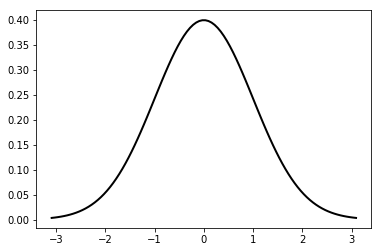

In [23]:
nd = stats.norm()
x = np.linspace(stats.norm.ppf(0.001),
                 stats.norm.ppf(0.999), 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, nd.pdf(x), 'k-', lw=2, label='frozen pdf');

sample_means = []
sample_size = 1000
for _ in range(10000):
    normal_sample = np.random.normal(loc = 0, size = sample_size)
    sample_means.append(normal_sample.mean())

nd = stats.norm()
x = np.linspace(stats.norm.ppf(0.001),
                 stats.norm.ppf(0.999), 100)

0.03162277660168379

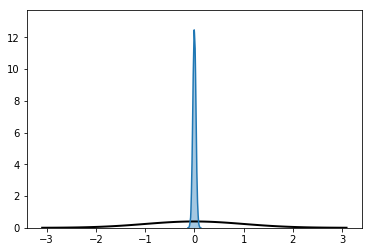

In [24]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, nd.pdf(x), 'k-', lw=2, label='frozen pdf')

sns.distplot(a = sample_means, ax = ax);

np.mean(sample_means)

np.std(sample_means)

1/np.sqrt(sample_size)

Here is the distribution of sample means.

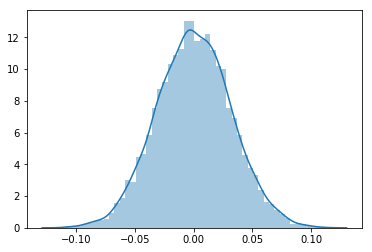

In [25]:
sns.distplot(a = sample_means);

Fact: If $X \sim N(\mu,\sigma)$, then the sampling distribution of the mean is normal with mean $\mu$ and variance $\frac{\sigma^2}{n}$, where $n$ is the sample size.

## Central Limit Theorem

(Maybe move this later? Or just do a demo with Shiny app)

Given a population with a finite mean $\mu$ and a finite non-zero variance $\sigma^2$, the sampling distribution of the mean approaches a normal distribution with a mean of $\mu$ and a variance of $\frac{\sigma^2}{n}$ as $n$, the sample size, increases.

This says that no matter the population distribution (within reason), the sampling distribution approaches a normal one.

For example, let's look at a uniform distribution on [0,1]. This is a distribution with mean 0 and standard deviation $\sqrt{\frac{1}{12}}$

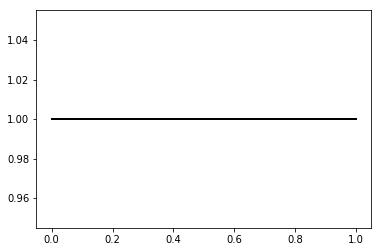

In [26]:
from scipy.stats import uniform

unif = uniform()
x = np.linspace(0,1, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, unif.pdf(x), 'k-', lw=2, label='frozen pdf');

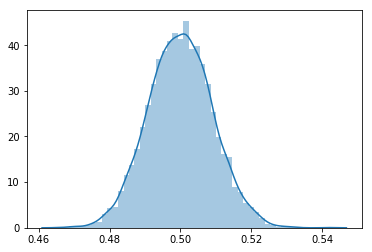

In [27]:
sample_means = []
sample_size = 1000
for _ in range(10000):
    normal_sample = np.random.uniform(size = sample_size)
    sample_means.append(normal_sample.mean())

sns.distplot(a = sample_means);

In [28]:
np.mean(sample_means)

np.std(sample_means)

np.sqrt(1/12) / np.sqrt(sample_size)

0.009128709291752768

So if we know the population variance, and we assume something about the population mean (as in the null hypothesis), we know exactly what the sampling distribution would look like under the null hypothesis.

But, this relies on knowing the population variance, which it seems very unlikely that we would if we don't know the population mean!

The best that we can do is to estimate the population variance using the sample variance. So there is some amount of uncertainty in the sampling distribution of the mean.

If we know that our data is (approximately) normally distributed,
$$T = \frac{X - \mu}{S / \sqrt{n}}$$
follows a $t$-distribution with $n$-1 degrees of freedom.

In [29]:
from scipy.stats import t
from ipywidgets import interact

@interact(df = 5)
def make_t_plot(df):
    normal_dist = stats.norm()
    t_dist = t(df = df)
    x = np.linspace(stats.norm.ppf(0.0001),
                     stats.norm.ppf(0.9999), 100)
    fig, ax = plt.subplots(1, 1, figsize = (8,6))
    ax.plot(x, normal_dist.pdf(x), 'k-', lw=2, label='normal pdf', color = 'blue')
    ax.plot(x, t_dist.pdf(x), 'k-', lw=2, label = 't-distribution')
    plt.legend()

interactive(children=(IntSlider(value=5, description='df', max=15, min=-5), Output()), _dom_classes=('widget-i…

The $t$-distribution is similar to the normal distribution, in that it is symmetric. The main difference is that a $t$-distribution has "fatter tails". As the degrees of freedom increase, the $t$-distributions more and more closely approximate a normal distribution.

In fact, is the sample size is at least 30, it is safe to simply use a normal distribution to estimate the sampling distribution of the mean.

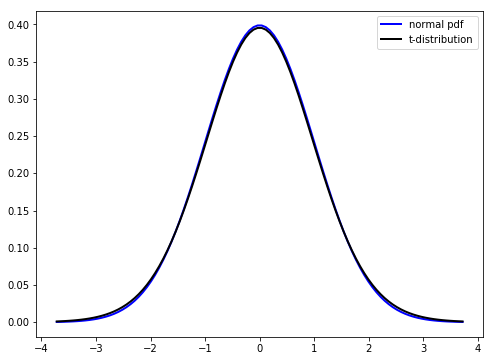

In [30]:
make_t_plot(30)

## Sampling Distribution of the Variance???

This would give an opportunity to talk about chi-squared distributions, but I'm not totally sure how important those are in the grand scheme of things.

## Condidence Intervals for the Mean

## Confidence Intervals for Proportion

Each given observation is a Bernoulli trial, meaning that the entire process of drawing a sample can be viewed as a series of Bernoulli trials => binomial distribution

## Bootstrap Confidence Intervals

The **empirical bootstrap** is a technique popularized by Bradley Efron in 1979. It is easy to understand and implement, but is just recently gaining popularity, since it is not really feasible without modern computing power. The bootstrap allows us to substitute fast computation for theoretical math.

**Big Idea:** perform computations on the data itself to estimate the variation of statistics that are themselves computed from the same data. That is, the data is ‘pulling itself up by its own bootstrap.’ 

Since the bootstrap allows us to estimate the variation of these statistics, we can use this technique to construct confidence intervals.

We know how to create confidence intervals for normally or nearly-normally distributed data. But what if our sample comes from some unknown distribution? We can still create a point estimate, but what we really want is a confidence interval.

The Central Limit Theorem says that for a large enough sample, the sampling distribution of the mean (or with some additional work, the proportion, or difference of means or proportions) is close enough to being normal that we can build confidence intervals. The trouble is, we don't know just how large "large enough" is. 

Also, what if we want an estimate for a more elaborate statistic than just a mean or proportion? Say we want a confidence interval for a median or for the third quartile.

As a bonus, when using the bootstrap, we can create confidence intervals not just for the mean, but for any type of statistic we would like to compute. For example, we might be interested in a confidence interval for the median. Tradional techniques of confidence intervals break down here, because we have to have some idea about the sampling distribution of this statistic. The bootstrap does not need this, since it is built out of the sample itself.

The bootstrap works be repeatedly resampling (with replacement) from our sample.

An **empirical bootstrap sample** is a resample of the same size as the original sample.

The **bootstrap principle** says that the distribution of statistics calculated from empirical bootstrap samples is approximately equal to the true distribution of the statistic of interest, and the variation is well-approximated by the variation in the boot strap statistics.

Note: we must use resamples of the same size, so that the variations match. Variation shrinks as sample size grows, so we need to use the same sized samples.

Note: The bootstrap will not ever improve out point estimate.

In [5]:
import pandas as pd
import numpy as np
sleeping = pd.read_csv('../data/atus_sleeping.csv')

In [2]:
sleeping

,participant_id,minutes_spent_sleeping,sex
0,20181211181182,270,Male
1,20180908180663,600,Male
2,20180706181412,355,Male
3,20181009181978,405,Male
4,20180503180964,270,Male
5,20181211181212,750,Male
6,20180111171481,439,Male
7,20181110182215,463,Male
8,20180201180821,690,Male
9,20180504180926,420,Male


Let's build a confidence interval for the median of the number of minutes spent sleeping.

In [3]:
sleeping.minutes_spent_sleeping.median()

550.0

Our point estimate is 550 minutes.

Now, the idea is to repeatedly resample with replacement from our observations.

In [20]:
num_resamples = 10000
conf_level = 0.9
margin = (1 - conf_level) / 2
lower_index = int(num_resamples * margin)
upper_index = int(num_resamples * (1-margin))

values = sleeping.minutes_spent_sleeping.to_list()

resample_medians = []

for i in range(num_resamples):
    resample = np.random.choice(values, len(values))
    resample_medians.append(np.median(resample))
    
resample_medians.sort()

print('lower bound: ', resample_medians[lower_index])
print('upper bound: ', resample_medians[upper_index])

lower bound:  497.5
upper bound:  595.0
